In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

plt.rcParams["figure.figsize"] = (8, 8)

#### For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

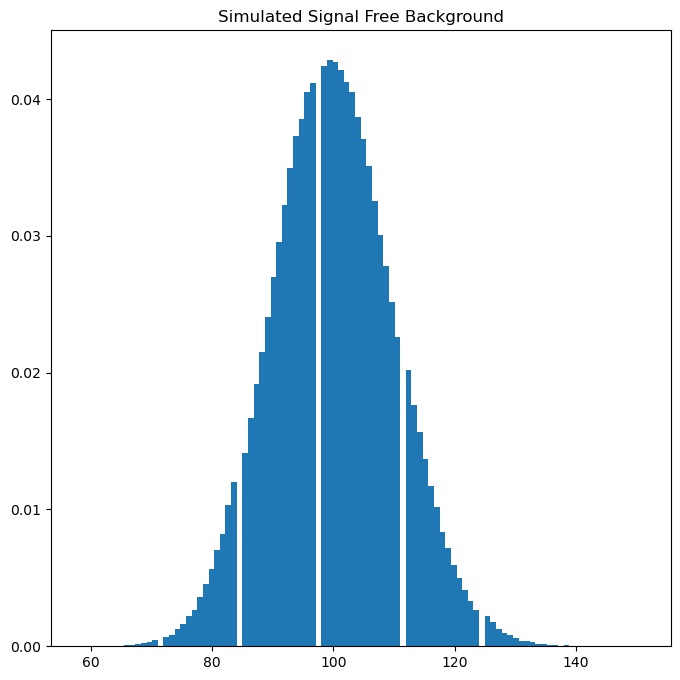

In [4]:
bg_poisson = stats.poisson.rvs(100, loc= 0, size = 1000000)
plt.hist(bg_poisson, density = True, bins = 100)
plt.title('Simulated Signal Free Background')
plt.show()

This is the background that we would see with no signal. It is poisson because we are looking at discrete events, but it appears Gaussian because of the Central Limit Theorem, since we generated a million points it has approached a Gaussian shape.

## Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

In [5]:
lam = 100
sigma = 5
probability = stats.norm.sf(sigma)
signal_new = stats.poisson.isf(probability, lam) 
print('In order to find a 5 sigma discovery we would need a signal of ', signal_new)

In order to find a 5 sigma discovery we would need a signal of  154.0


Check if this is correct:

In [6]:
probability2 = stats.poisson.sf(154, lam)
sigma2 = stats.norm.isf(probability2)
print('The significance of a 154 signal is ' , sigma2, 'sigma.')

The significance of a 154 signal is  5.05750350583485 sigma.


## Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

Let's figure out what signal corresponds to 8$\sigma$ for our background, we will inject this signal:

In [7]:
sigma3 = 8
probability = stats.norm.sf(sigma3)
signal_new = stats.poisson.isf(probability, lam)  
print('In order to find an 8 sigma discovery we would need a signal of ', signal_new)

In order to find an 8 sigma discovery we would need a signal of  190.0


In [8]:
# Inject signal at 1000 random points

new_bg_poisson = bg_poisson  
for i in range(1000):
    index = random.randint(0, 100000)
    new_bg_poisson[index] += 190

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

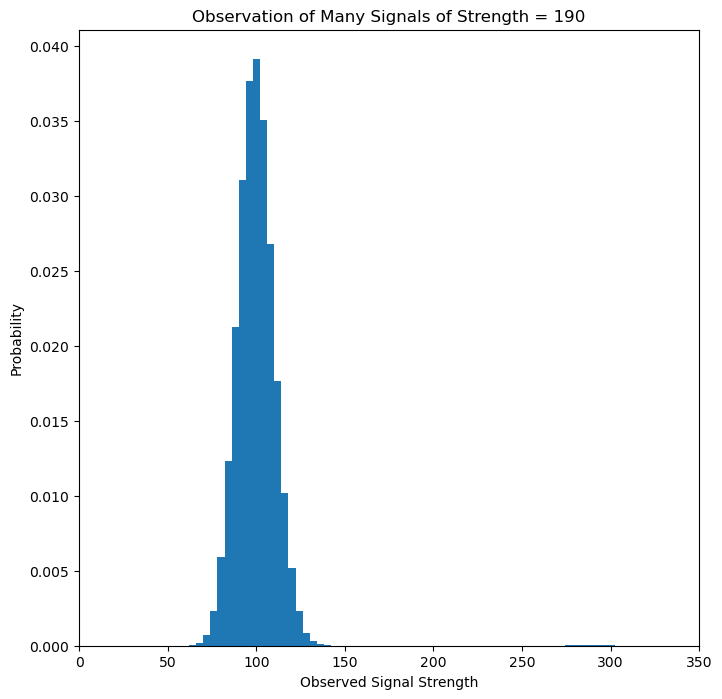

In [9]:
plt.hist(new_bg_poisson, density = True, bins = 100)
plt.xlim([0, 350])
plt.title('Observation of Many Signals of Strength = 190')
plt.xlabel('Observed Signal Strength')
plt.ylabel('Probability')
plt.show()

This histogram shows us our background and the injected signal of 190. Even though we always injected a signal of exactly 190 the background added or subtracted to it, so what we actually observe has a range around 190. The most probable reading has a peak around 190 but we do not always get this signal. 

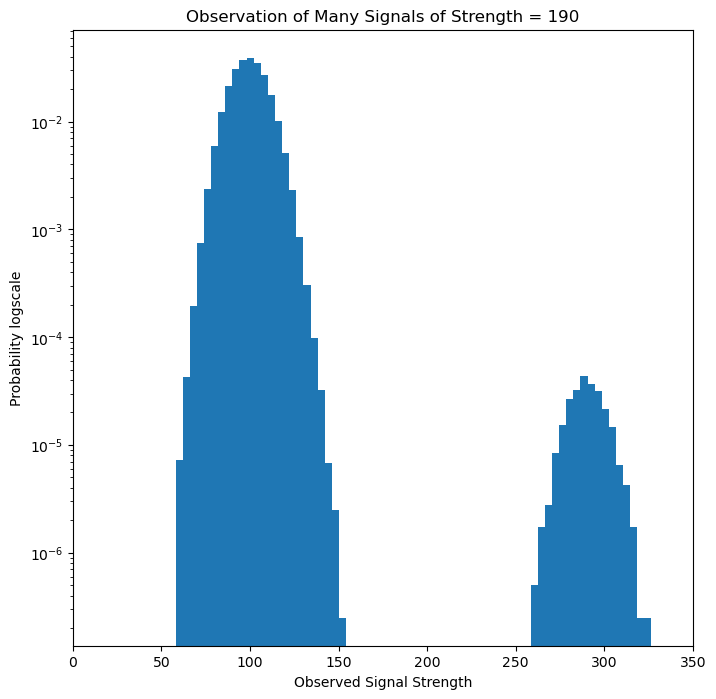

In [10]:
plt.hist(new_bg_poisson, density = True, bins = 100)
plt.xlim([0, 350])
plt.yscale('log')
plt.title('Observation of Many Signals of Strength = 190')
plt.xlabel('Observed Signal Strength')
plt.ylabel('Probability logscale')
plt.show()

Semi-log plot of the distribution, showing that they are both near Gaussian distributions, background is symmetric about 100 and the injected signal is symmetric about 290 (which is the background plus the injected signal). 

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

No, the shape of the observed signal is symmetric around 190 so it is equally likely to be stronger or weaker than 190. We can see this on the log plot better, the histogram is fairly close to an upside down parabola so it can be estimated to be Gaussian, meaning it is symmetric around the mean of our injected signal. This makes sense because our background also has a Gaussian shape and all we did was add a constant value to the background, so the observed signal must have the same shape as the background.

## Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

Now we will inject a range of signal values instead of only an 8 sigma value of strengtth 190. This is similar to what we did in the last question, but now we would see a lot more observed signal histograms around a particular value, so we can visualize this with a 2D histogram. 

In [11]:
probability2 = stats.poisson.sf(550, lam)
sigma2 = stats.norm.isf(probability2)
print('The significance of a 550 strength signal is ' , sigma2, 'sigma.')

The significance of a 550 strength signal is  31.267546994347228 sigma.


We want to inject signals in the range of 0$\sigma$ to 30$\sigma$ or more, and we see that a signal of 550 is about 31 sigma. We will inject signals from strengths of 0 to 550.

<ipython-input-12-68e5b8e381cb>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters, Psd.T)


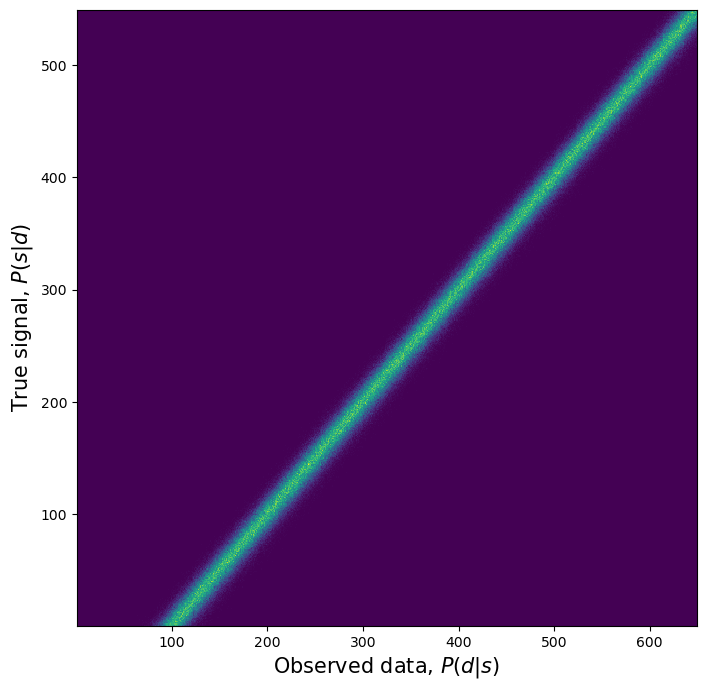

In [12]:
bkgd = scipy.stats.poisson.rvs(100, loc=0, size=1000000)
signal = np.random.uniform(low=0.0, high=550, size=(1000000))
data = bkgd + signal

signaledges = np.linspace(0,550, 551)
dataedges = np.linspace(0, 650, 651)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters, Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 15)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 15)
plt.show()



b) For the same injected signal power as in problem 2, show that you get the same answer.

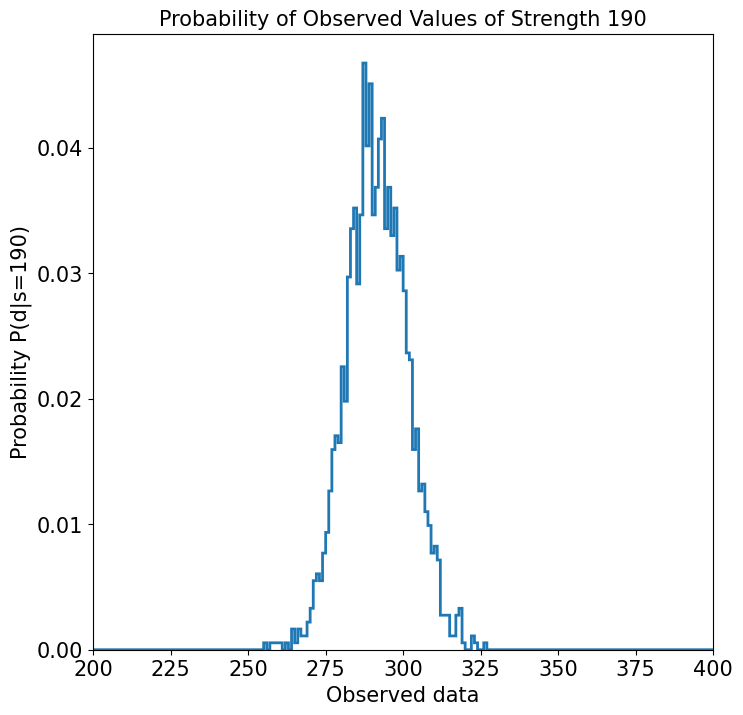

In [13]:
bin_signal = np.digitize(190, signaledges) 
    
prob_data = Psd[:, bin_signal]

prob_data = prob_data*(1/np.sum(prob_data))

plt.stairs(prob_data, edges = dataedges, linewidth = 2)
plt.title(f'Probability of Observed Values of Strength 190', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(d|s=190)', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.xlim([200,400])
plt.show()

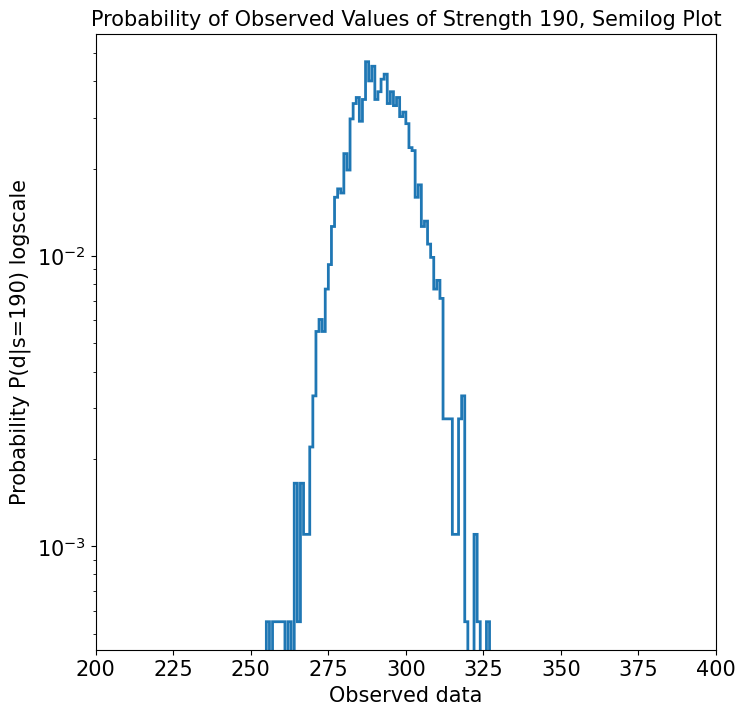

In [14]:
plt.stairs(prob_data, edges = dataedges, linewidth = 2)
plt.title(f'Probability of Observed Values of Strength 190, Semilog Plot', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(d|s=190) logscale', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.xlim([200,400])
plt.yscale('log')
plt.show()

This is what we got for the other problem. The oberved data for the injected signal strength of 190 is symmetric about an observed signal of 290 and it is roughly Gaussian. 

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

Now I will take a vertical slice of the 2D histogram at some value above 5$\sigma$. I will try to find the signal strength corresponding to 10$\sigma$.

In [15]:
probability2 = stats.poisson.sf(220, lam)
sigma2 = stats.norm.isf(probability2)
print('The significance of a 220 strength signal is ' , sigma2, 'sigma.')

The significance of a 220 strength signal is  10.39277942268975 sigma.


1.0


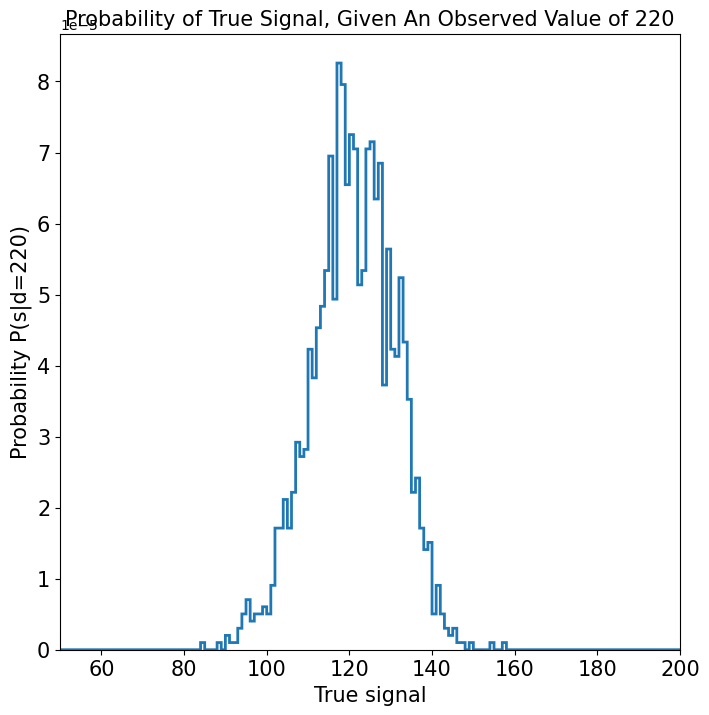

In [16]:
obs_signal = 220
bin_obs = np.digitize(obs_signal, dataedges) - 1
prob_obs = Psd[bin_obs, :]

prob_obs1 = prob_obs*(1/(np.sum(prob_obs)))
print(np.sum(prob_data))

plt.stairs(prob_obs, edges = signaledges, linewidth = 2)
plt.title(f'Probability of True Signal, Given An Observed Value of 220', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(s|d=220)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.xlim(50,200)
plt.show()

d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

Our task is to find the value that corresponds to 34% of the distribution above and below the mean of our observed signal, so that we can report our signal strength with a range of uncertainty. Because the distribution may not be exactly symmetric we must find the values corresponding to 34% below the mean and 34% above the mean and report them separately. Although I suspect the values to be the same because our background at zero signal was close to a Gaussian. In order to do this we have to find the mean value first, since it may not be exactly 120. Since we already have an array of probabilities in prob_obs1, I can sum each value to figure out which signal strength corresponds to the mean at 50%, and which signals correspond to 1$\sigma$ below the mean and above the mean.

1$\sigma$ uncertainty corresponds to a probability of 34% from a Gaussian distribution:

In [17]:
prob = stats.norm.cdf(1)
print(prob - .5)

0.3413447460685429


In [19]:
# find mean at 50% 
p=0.5
for i in range(prob_obs1.size):
    value=np.trapz(prob_obs1[:i])
    if value >= p:
        print('At 50% of the data we can find our mean to be: ', i)
        break

# find upper bound at 1 sigma ~84%
p=stats.norm.cdf(1)
for i in range(prob_obs1.size):
    signal_plus1 =np.trapz(prob_obs1[:i])
    if signal_plus1 >= p:
        print('For 1 sigma above our mean we havea signal of: ', i)
        break

# find lower bound at -1 sigma ~15%
p=stats.norm.cdf(-1)
for i in range(prob_obs1.size):
    value=np.trapz(prob_obs1[:i])
    if value >= p:
        print('For 1 sigma below our mean we have a signal of: ' , i)
        break

At 50% of the data we can find our mean to be:  122
For 1 sigma above our mean we havea signal of:  132
For 1 sigma below our mean we have a signal of:  112


e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

First, in order to calculate the uncertainty range I had to find the mean since it may not be exactly at 120. I did this by finding which value corresponded to a probability of 50%. Then, by finding which signal corresponded to 15% of the data we found the signal 1 sigma below our true signal strength. Then we found the signal corresponding to 84% of the data which gave us the signal 1 sigma above the mean. The uncertainty for 1 $\sigma$, which was 10, happened to be symmetric about the mean, which makes sense because our initial background was symmetric about its mean since we had near a Gaussian distribution due to the Central Limit Theorem. 